##  1. Общее описание

**Аналитическая задача** — провести анализ данных с целью выделения портрета клиентов, которые будут открывать карту, и портрета клиентов, которые не будут открывать карту.

## Описание данных
Каждый клиент описывается следующим набором признаков:

|Признак|Комментарий|
|--:|:--|
|`client_id`|Идентификационный номер|
|`gender`|Пол|
|`age`|Возраст|
|`marital_status`|Семейный статус|
|`job_position`|Работа|
|`credit_sum`|Сумма кредита|
|`credit_month`|Срок кредитования|
|`score_shk`|Внутренняя скоринговая оценка|
|`education`|Образование|
|`tariff_id`|Идентификационный номер тарифа|
|`living_region`|Регион|
|`monthly_income`|Месячный заработок|
|`credit_count`|Количество кредитов у клиента|
|`overdue_credit_count`|Количество просроченных кредитов у клиента|
|`open_account_flg`|Факт открытия кредитного счета в данном банке|
|`avregzarplata`|Средняя заработная плата в регионе|
|`okrug`|Федеральный округ|
|date_bank|Дата обращения в банк|

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Отбор признаков и портреты клиентов:
- исследовать признаки в разрезе групп;
- выявить наличие значимых различий в значениям признаков в разрезе групп;
- сформулировать и проверить гипотезы о равенстве значений показателей по группам

**Шаг 5.** Построить классификационные модели
- Построить несколько моделей классификации и сравнить их.    




Дополнительное задание (выполнение по желанию):  построить классификационные модели для прогнозирования значений целевой переменной.

# **Подключим необходимые библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import jarque_bera

from scipy.stats import (pearsonr,
                         spearmanr,
                         pointbiserialr,
                         kendalltau)
import scipy.stats as st
import math

# подключение классификаторов

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# ссылка на метрики классификации
# https://scikit-learn.org/0.15/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import classification_report

# поиск по сетке
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# **Шаг №1. Загрузка данных**

In [2]:
df = pd.read_csv('/content/vkr_dataset_open_credit_card.csv')
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
0,1,2,48.0,3.0,15,59998,10,"0,770249",2.0,28,23.0,8.0,25850.0,30000.0,1.0,1.0,0,2016-02-16 18:54:34
1,2,1,28.0,NaN,15,10889,6,"0,248514",2.0,2,30.0,7.0,66880.0,43000.0,2.0,0.0,0,2016-02-15 12:39:04
2,3,2,32.0,3.0,14,10728,12,"0,459589",4.0,2,64.0,2.0,23430.0,23000.0,5.0,0.0,0,2015-01-27 18:57:19
3,4,1,27.0,2.0,14,"12009,09",12,"0,362536",2.0,2,8.0,8.0,23650.0,17000.0,2.0,0.0,0,2019-05-02 17:57:10
4,5,2,45.0,3.0,14,"16908,89",10,"0,421385",4.0,2,77.0,6.0,26620.0,NaN,1.0,0.0,0,2015-09-22 16:28:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,1,27.0,4.0,14,64867,12,"0,535257",2.0,2,57.0,2.0,27060.0,40000.0,6.0,0.0,0,2018-11-24 18:35:26
170742,170743,1,24.0,3.0,14,17640,6,"0,573287",4.0,28,63.0,3.0,45430.0,30000.0,1.0,0.0,0,2018-06-08 16:06:39
170743,170744,1,31.0,4.0,14,"27556,47",10,"0,416098",2.0,19,41.0,1.0,33990.0,40000.0,1.0,0.0,0,2016-09-24 12:18:06
170744,170745,1,53.0,2.0,10,6189,12,"0,482595",4.0,2,39.0,2.0,22990.0,31000.0,2.0,0.0,0,2017-11-05 18:57:58




---



# **Шаг №2. Первичная обработка данных**

***корректировка заголовков***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  object 
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

**Вывод**

*Корректировка заголовков не требуется*
*   заголовки на латинице
*   пробелов в названии нет
*   все буквы маленькие


---




***Скорректируем типы признаков***

*   credit_sum     object --> float64
*   score_shk      object -- > float64
*   date_bank      object --  > datetime64[s]




In [4]:
# просмотр уникальных значений
for col in df.columns:
    print('-----'+col)
    display(df[col].unique())
    print()

-----client_id


array([     1,      2,      3, ..., 170744, 170745, 170746])


-----gender


array([2, 1])


-----age


array([48., 28., 32., 27., 45., 37., nan, 26., 23., 43., 36., 54., 33.,
       40., 41., 42., 22., 34., 24., 31., 38., 44., 64., 53., 39., 35.,
       29., 58., 69., 56., 25., 55., 67., 63., 30., 21., 52., 46., 65.,
       47., 62., 49., 59., 51., 57., 50., 18., 19., 61., 60., 66., 68.,
       20., 70., 71.])


-----marital_status


array([ 3., nan,  2.,  4.,  5.,  1.])


-----job_position


array([15, 14,  6,  4,  1, 10,  2, 16,  8, 17, 18, 13,  3, 11,  5, 12,  7,
        9])


-----credit_sum


array(['59998', '10889', '10728', ..., '29630', '23827', '27556,47'],
      dtype=object)


-----credit_month


array([10,  6, 12, 14, 18, 13, 15,  4, 24,  8, 16,  9, 11,  3, 20,  5,  7,
       36, 19, 28, 26, 17, 32, 23, 30, 25, 22, 21, 27, 31, 29])


-----score_shk


array(['0,770249', '0,248514', '0,459589', ..., '0,775188', '0,957675',
       '0,642487'], dtype=object)


-----education


array([ 2.,  4., nan,  5.,  3.,  1.])


-----tariff_id


array([28,  2, 25,  1, 19, 20, 29, 18,  3, 30, 10, 11, 22, 23,  6,  8,  9,
       12,  7, 31, 21,  4, 32, 13, 24, 26,  5, 14, 15, 16, 33, 27, 17])


-----living_region


array([23., 30., 64.,  8., 77., 68., 33., 31., 73., 63., 46.,  3., 40.,
       19., 17.,  9., 60., 74., 14.,  5., 22., 59., 57., 66., 43., 12.,
       37., 10.,  4., 35., 25., 75., 32., 24., 47., 55.,  2., 76., 62.,
       70., 82.,  7., 27., 38., 20., 36., 78., 26., 72., 44., 52., 41.,
       67., 21., 48., 39., 51., 71., 29., 53., 13., 11.,  1., 15., 69.,
       58., 34., 28., 56., 61., 65., 80., nan, 18., 54., 50., 45.,  6.,
       16., 81., 49., 79.])


-----okrug


array([ 8.,  7.,  2.,  6.,  4.,  3.,  5.,  1., nan])


-----avregzarplata


array([25850., 66880., 23430., 23650., 26620., 22000., 26840., 42460.,
       56000., 45430., 28160., 36850., 27280., 18040., 27060., 28820.,
       23320., 32450., 22550., 32010., 32780., 24310., 25300., 26070.,
       27390., 17600., 22770., 22880., 43670., 29260., 27720., 53460.,
       34540., 35200., 20130., 28050., 16830., 17490., 21010., 25520.,
       20680., 39380., 33990., 20020., 17270., 22990., 32230., 55880.,
       21230., 21120., 31240., 20900., 18920., 21450., 30580., 24640.,
       18590., 21340., 51260.,    nan, 50600., 24860., 20790., 56100.,
       25000.])


-----monthly_income


array([30000., 43000., 23000., ..., 57680., 73600., 14460.])


-----credit_count


array([ 1.,  2.,  5.,  0.,  3.,  7.,  4.,  6., nan,  8., 10.,  9., 12.,
       11., 14., 15., 13., 16., 19., 17., 18., 21.])


-----overdue_credit_count


array([ 1.,  0., nan,  2.,  3.])


-----open_account_flg


array([0, 1])


-----date_bank


array(['2016-02-16 18:54:34', '2016-02-15 12:39:04',
       '2015-01-27 18:57:19', ..., '2016-09-24 12:18:06',
       '2017-11-05 18:57:58', '2015-12-10 12:19:08'], dtype=object)

In [5]:
df['credit_sum'] = df['credit_sum'].str.replace(',', '.')
df['score_shk'] = df['score_shk'].str.replace(',', '.')

In [6]:
df = df.astype({'credit_sum': 'float64',
                'score_shk': 'float64',
                'date_bank':'datetime64[s]'})



---



***Восстановление пропущенныхзначений***

In [7]:
# пропущенные значения есть в
# age	Возраст
# marital_status	Семейный статус
# credit_sum	Сумма кредита
# score_shk	Внутренняя скоринговая оценка
# education	Образование
# living_region	Регион
# okrug	Федеральный округ
# avregzarplata	Средняя заработная плата в регионе
# monthly_income	Месячный заработок
# credit_count	Количество кредитов у клиента
# overdue_credit_count	Количество просроченных кредитов у клиента

# Причем кол-во пропушенных значений в okrug и avregzarplata одинаково, может это у одних и тех же записей
# redit_count и overdue_credit_count - тоже одинаково

# пока удалим пропущеные значения

df.isna().sum()
df_new = df.dropna()
df_new.isna().sum()

,0
client_id,0
gender,0
age,0
marital_status,0
job_position,0
credit_sum,0
credit_month,0
score_shk,0
education,0
tariff_id,0


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161327 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype        
---  ------                --------------   -----        
 0   client_id             161327 non-null  int64        
 1   gender                161327 non-null  int64        
 2   age                   161327 non-null  float64      
 3   marital_status        161327 non-null  float64      
 4   job_position          161327 non-null  int64        
 5   credit_sum            161327 non-null  float64      
 6   credit_month          161327 non-null  int64        
 7   score_shk             161327 non-null  float64      
 8   education             161327 non-null  float64      
 9   tariff_id             161327 non-null  int64        
 10  living_region         161327 non-null  float64      
 11  okrug                 161327 non-null  float64      
 12  avregzarplata         161327 non-null  float64      
 13  monthly_income     



---



***Проверка наличие дублирующихся записей***

In [9]:

print(f'Количество дублирующихся записей -- {df_new.duplicated().sum()}.')

Количество дублирующихся записей -- 0.




---



***Проверка наличие аномальных значений***

In [10]:
# проверить наличие аномальных значений;
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df_new.describe(percentiles=per)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
count,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.00000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327.000000,161327
mean,85371.322271,1.478748,37.043334,3.176926,13.158275,25933.71104,10.990783,0.464983,3.188406,13.947709,43.047915,4.808557,32877.024801,40415.741587,2.107527,0.046068,0.164913,2018-07-02 12:09:48
min,1.000000,1.000000,18.000000,1.000000,1.000000,2736.00000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,16830.000000,5000.000000,0.000000,0.000000,0.000000,2015-01-01 10:36:12
1%,1738.260000,1.000000,21.000000,1.000000,1.000000,4990.00000,4.000000,0.208422,2.000000,1.000000,3.000000,1.000000,17490.000000,11000.000000,0.000000,0.000000,0.000000,2015-01-27 17:27:12
5%,8575.300000,1.000000,24.000000,2.000000,4.000000,8029.00000,6.000000,0.277135,2.000000,2.000000,7.000000,2.000000,20130.000000,15000.000000,0.000000,0.000000,0.000000,2015-05-08 18:15:53
25%,42700.500000,1.000000,29.000000,3.000000,14.000000,14828.00000,10.000000,0.376793,2.000000,2.000000,25.000000,2.000000,25520.000000,25000.000000,1.000000,0.000000,0.000000,2016-10-02 18:15:54
50%,85374.000000,1.000000,35.000000,3.000000,14.000000,21077.00000,10.000000,0.457566,4.000000,19.000000,40.000000,5.000000,27390.000000,35000.000000,2.000000,0.000000,0.000000,2018-06-30 11:23:47
75%,128060.500000,2.000000,43.000000,4.000000,14.000000,31768.00000,12.000000,0.546254,4.000000,28.000000,63.000000,7.000000,42460.000000,50000.000000,3.000000,0.000000,0.000000,2020-03-31 12:40:33
95%,162193.400000,2.000000,57.000000,4.000000,15.000000,59750.70000,18.000000,0.682407,5.000000,28.000000,76.000000,8.000000,66880.000000,80000.000000,5.000000,0.000000,1.000000,2021-08-26 11:48:42
99%,169029.740000,2.000000,65.000000,5.000000,15.000000,75376.40000,24.000000,0.750998,5.000000,30.000000,80.000000,8.000000,66880.000000,125000.000000,8.000000,1.000000,1.000000,2021-12-06 11:56:20


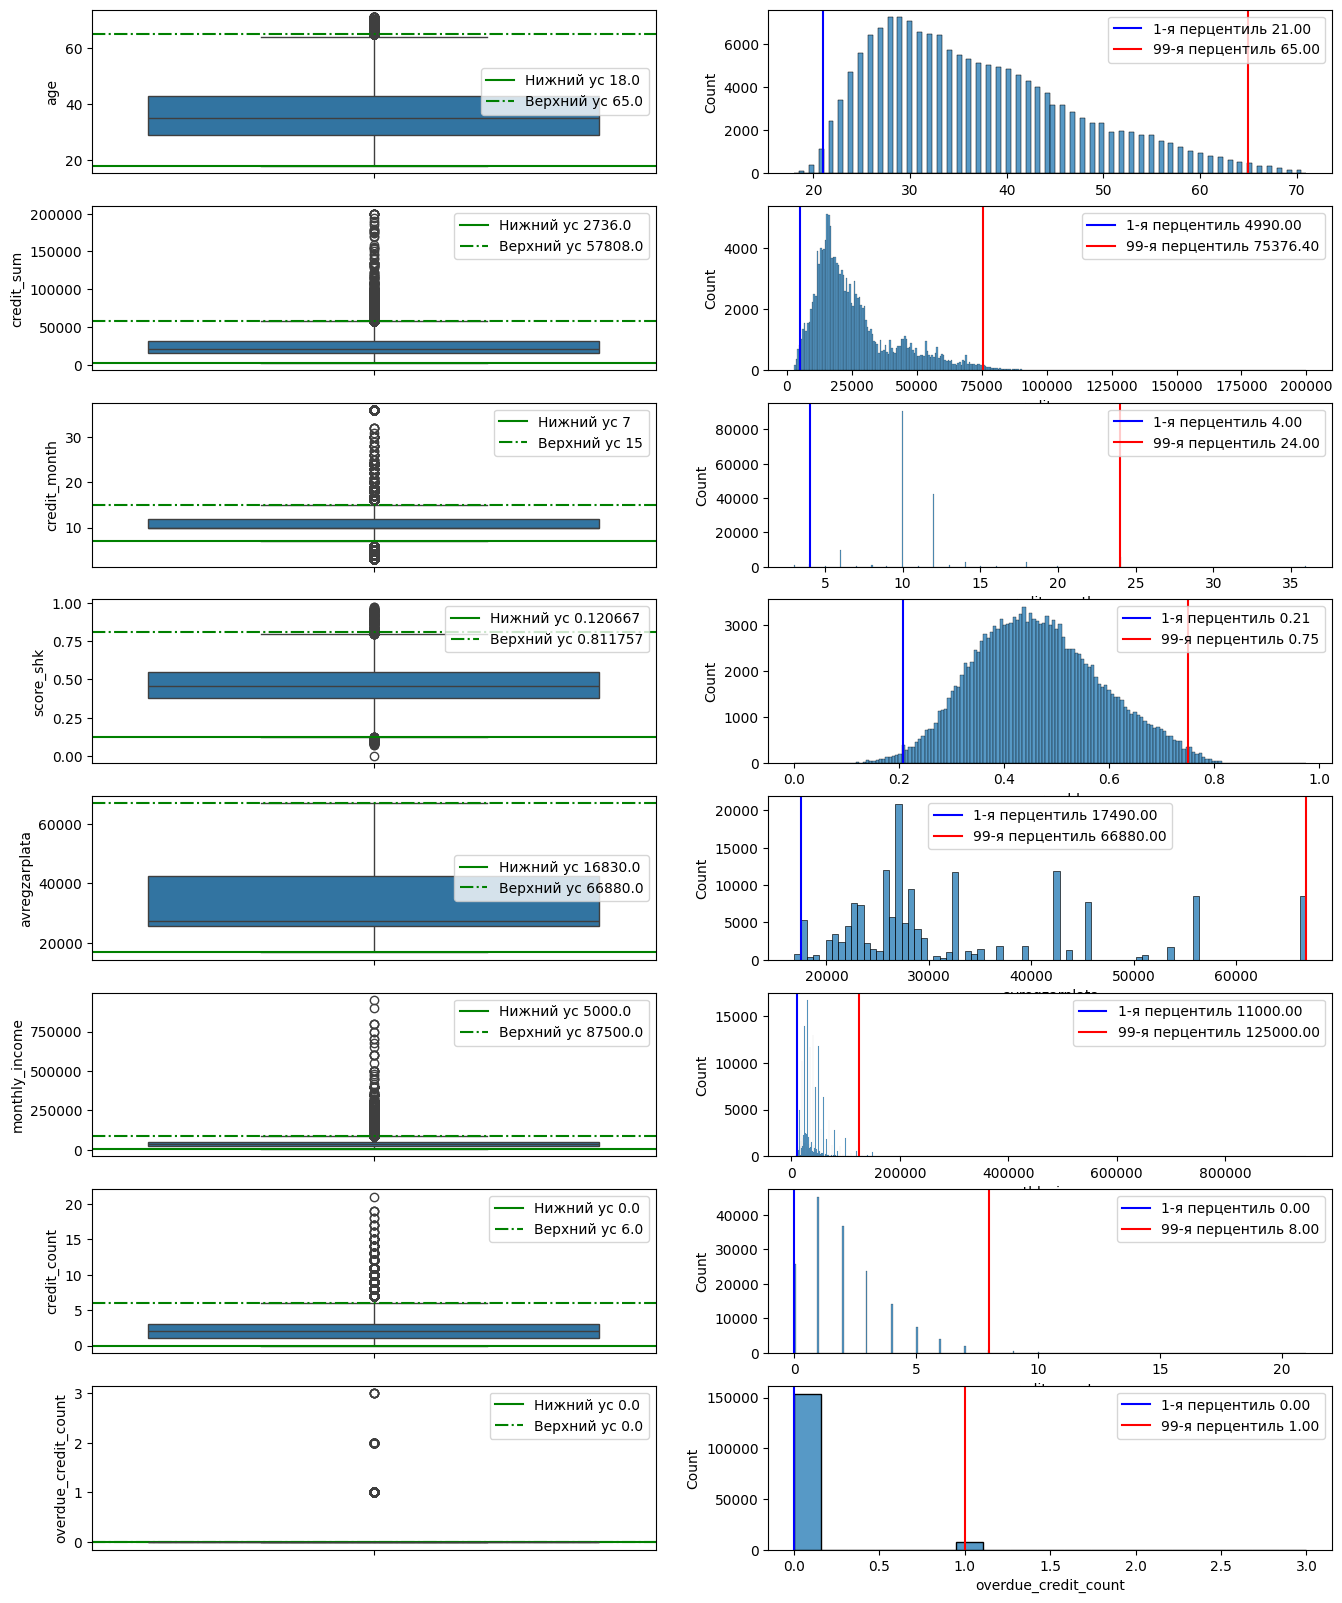

In [11]:
# исследуем аномальные записи
# Проанализируем непрерывные признаки

# credit_sum	Сумма кредита
# avregzarplata	Средняя заработная плата в регионе
# monthly_income	Месячный заработок
# credit_count	Количество кредитов у клиента
def calc_boxplot(df_col : pd.Series) -> tuple:

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

lst_col_boxplot = ['age','credit_sum', 'credit_month', 'score_shk', 'avregzarplata',
            'monthly_income', 'credit_count', 'overdue_credit_count']

plt.subplots(len(lst_col_boxplot),2, figsize=(16,20))
for index, col in enumerate(lst_col_boxplot):
    plt.subplot(len(lst_col_boxplot),2, 2*index+1)
    ax = sns.boxplot(data=df_new,y=col)
    per_1 = np.nanpercentile(df_new[col],1 )
    per_99 = np.nanpercentile(df_new[col],99)

    actual_loval, actual_hival = calc_boxplot(df[col])

    ax.axhline(actual_loval,
           color='green',
           label=f"Нижний ус {actual_loval}")

    ax.axhline(actual_hival,
           color='green',
           label=f"Верхний ус {actual_hival}",
           linestyle='dashdot')

    plt.legend()

    plt.subplot(len(lst_col_boxplot),2, 2*index+2)
    ax = sns.histplot(data=df_new,x=col)
    ax.axvline(per_1, color='blue',
               label=f'1-я перцентиль {per_1:.2f}')
    ax.axvline(per_99, color='red',
               label=f'99-я перцентиль {per_99:.2f}')
    plt.legend()


In [12]:
# Удаление аномалий
lst_columns = ['age','credit_sum', 'credit_month', 'score_shk', 'avregzarplata',
            'monthly_income', 'credit_count', 'overdue_credit_count']
lst_u = []
for col in lst_columns:
    per_1 = np.nanpercentile(df[col], 1)
    per_99 = np.nanpercentile(df[col], 99)
    u = ' '
    u = f"({col}.between({per_1}, {per_99}))"
    lst_u.append(u)

request = ' & '.join(lst_u)
df_clear = df_new.query(request).copy()

In [13]:
print(f"Процент потерь --- {(1 - df_clear.shape[0]/df.shape[0]):.2%}.")

Процент потерь --- 13.31%.


Вывод: Удалили аномальные значения.
Были значения за пределами верхнего и нижнего усов

1.   monthly_income	- Месячный заработок
2.   credit_count	- Количество кредитов у клиента
3.   overdue_credit_count	- Количество просроченных кредитов у клиента
4.   credit_sum	- Сумма кредита
5.   avregzarplata	Средняя заработная плата в регионе





---



# **Шаг №3.Проведем исследовательский анализ данных**

***Исследуем распределения признаков***


In [14]:
# Поделим все признаки на категориальные и непрерывные

In [15]:
# непрерывные признаки
lst_cont = ['age','credit_sum', 'credit_month', 'score_shk', 'avregzarplata',
            'monthly_income', 'credit_count', 'overdue_credit_count']

# категориальные признаки
lst_cat = ['gender','marital_status', 'job_position','education', 'tariff_id',
           'living_region', 'okrug']

In [16]:
# исследуем непрерывные числовые признаки в разрезе целевой переменной --
#       open_account_flg - Факт открытия кредитного счета в данном банке
df_clear.groupby('open_account_flg')[lst_cont].agg(['median', 'mean'])

age            credit_sum               credit_month  \
                 median       mean     median          mean       median   
open_account_flg                                                           
0                  35.0  36.767696   21408.00  25943.532595         10.0   
1                  35.0  36.733567   19613.64  22940.920119         10.0   

                            score_shk           avregzarplata                \
                       mean    median      mean        median          mean   
open_account_flg                                                              
0                 10.922986  0.456671  0.464327       27390.0  32705.022477   
1                 11.243228  0.465501  0.473959       27720.0  33294.167982   

                 monthly_income               credit_count            \
                         median          mean       median      mean   
open_account_flg                                                       
0                       35000.0  39220.913979          2.0  2.038515   
1                       35000.0  38535.223265          2.0  2.192211   

                 overdue_credit_count            
                               median      mean  
open_account_flg                                 
0                                 0.0  0.042360  
1                                 0.0  0.054473

***Мы видим, что все показатели по статистикам здесь более-менее одинаковы в разрезе целевой переменной "Факт открытия кредитного счета в данном банке"***

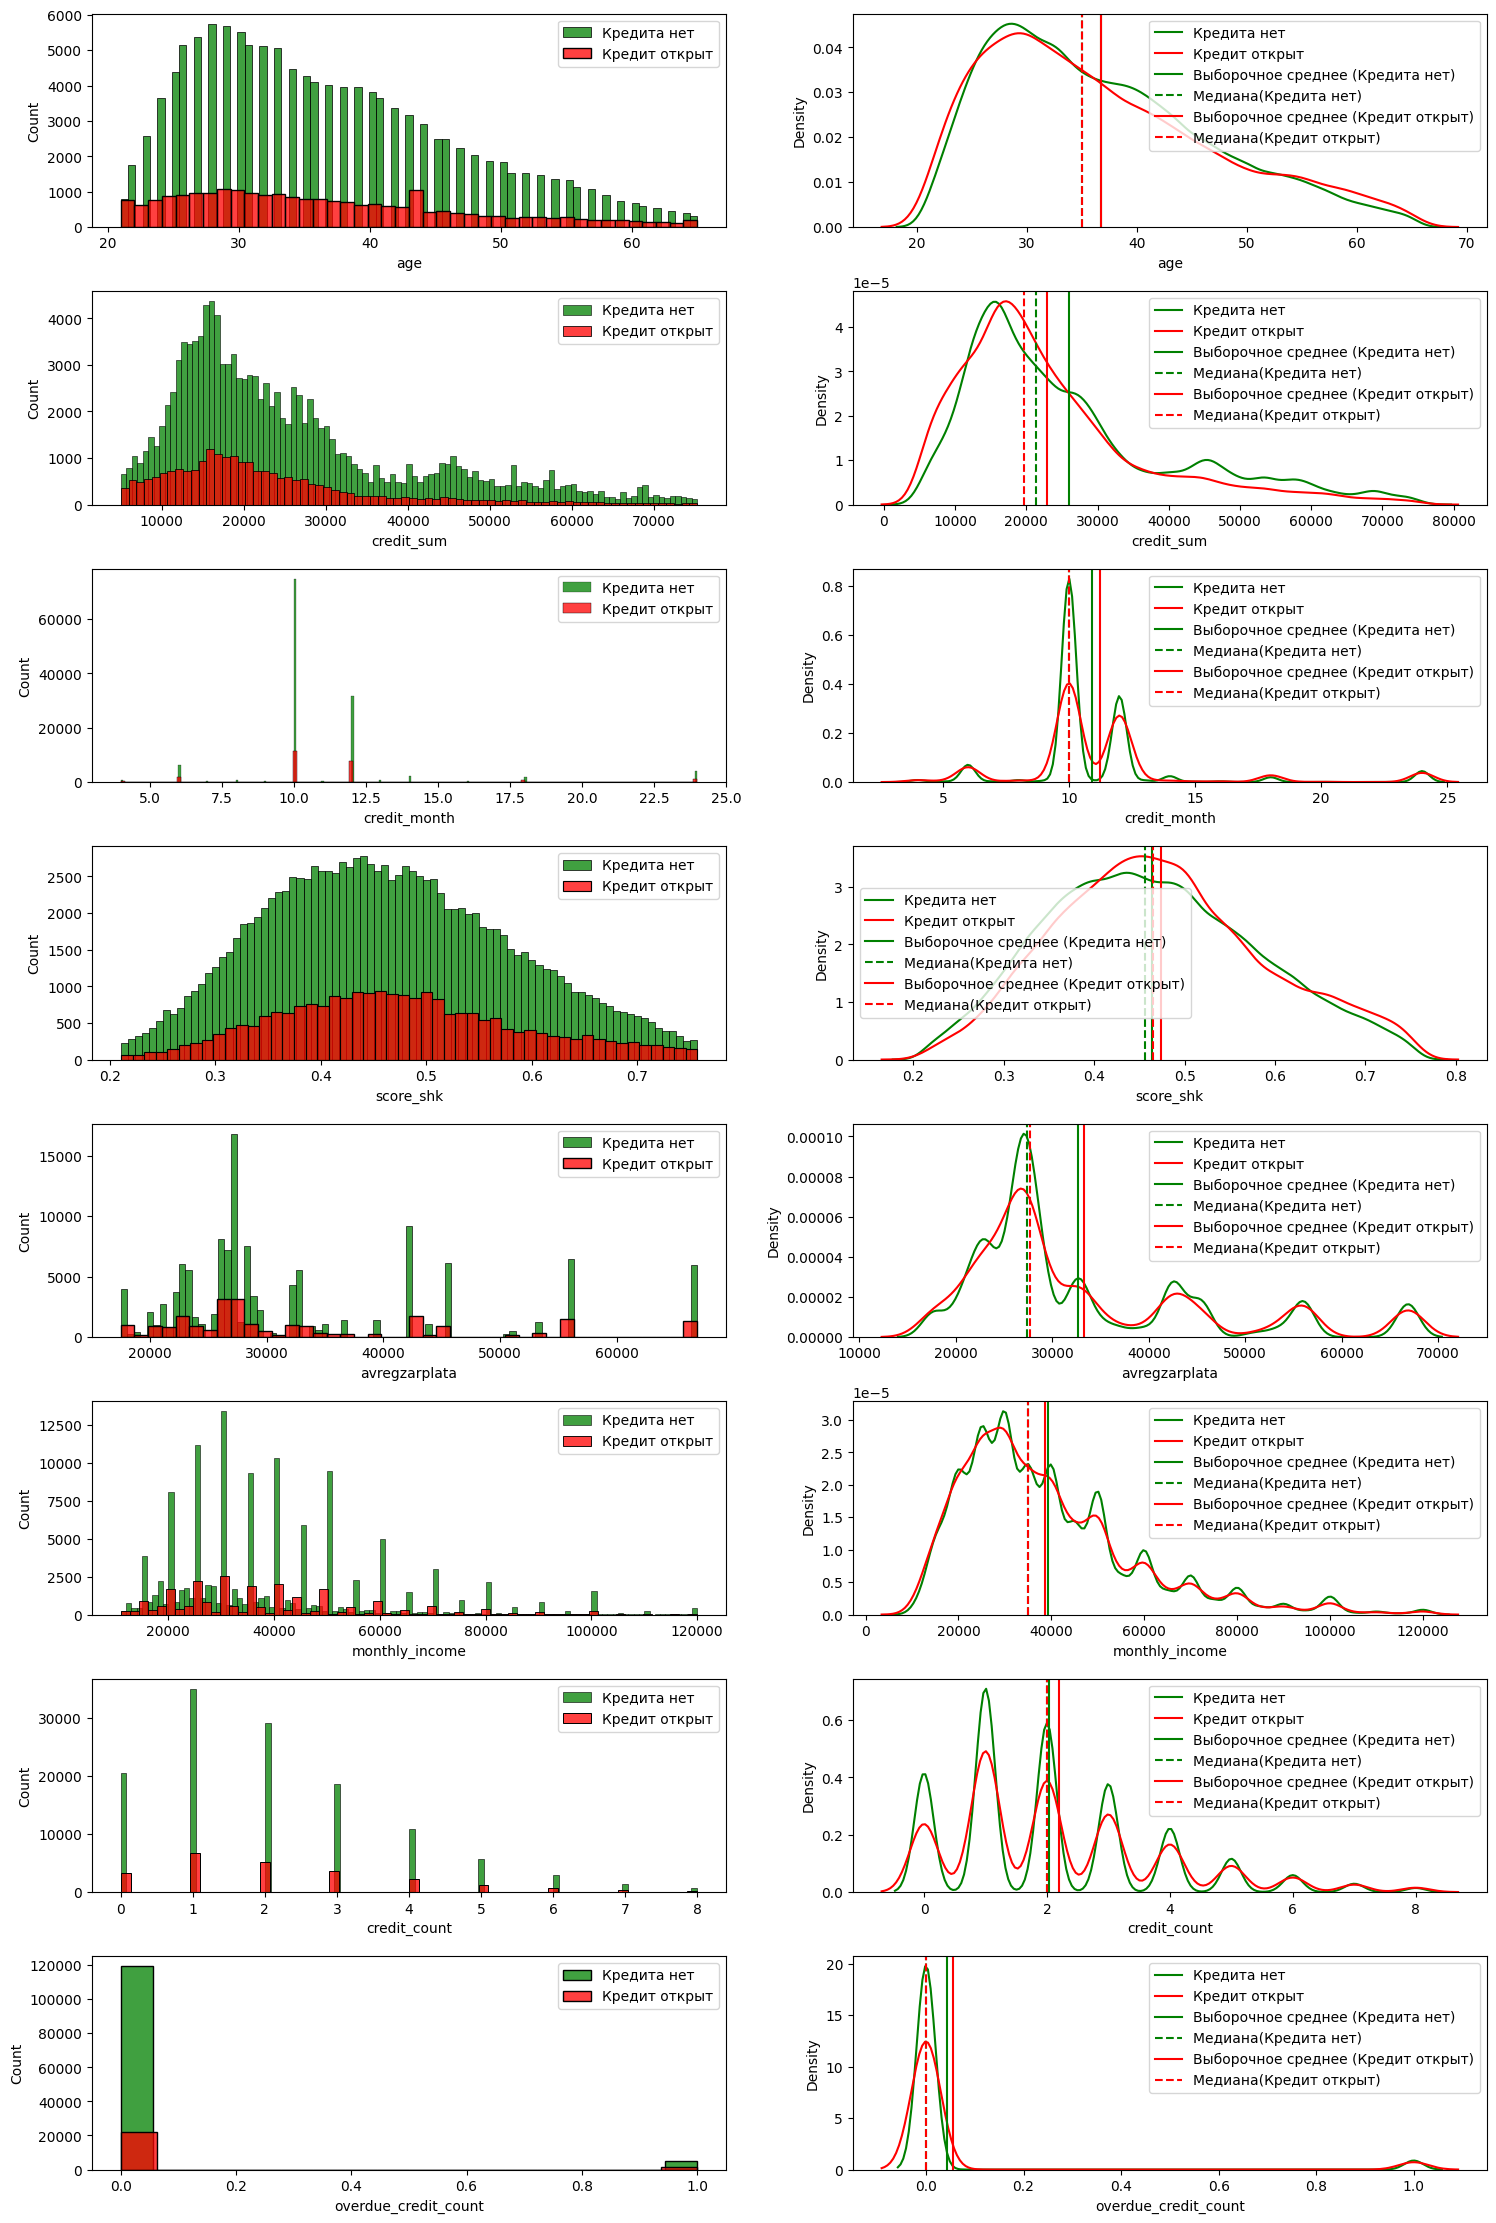

In [17]:
# исследуем признаки

# 'age','credit_sum', 'credit_month', 'score_shk', 'avregzarplata',
#             'monthly_income', 'credit_count', 'overdue_credit_count'
# в разрезе целевого признака open_account_flg

# Построить гистограмму, отображающую распределение признаков

# fig, ax = plt.subplots(len(lst_cont),2, figsize = (12,20))
# plt.subplots_adjust(hspace = 0.3)
# for index, col in enumerate(lst_cat):
#     plt.subplot(len(lst_cont),2, index+1)
#     ax=sns.histplot(data=df_new, x=col, hue="open_account_flg")
#     ax.set_title(f'Распределение признака \n <<<{col}>>>')
#     plt.show()


# for index, col in enumerate(lst_cont,start=1):
#     plt.figure(figsize=(12, 6))
#     sns.histplot(data=df_clear, x=col, hue="open_account_flg")
#     plt.show()

fig, ax = plt.subplots(8, 2, figsize = (18,28))
plt.subplots_adjust(hspace = 0.3)
for index, col in enumerate(lst_cont):
    plt.subplot(8,2, 2*index+1)
    ax = sns.histplot(data=df_clear[df_clear.open_account_flg == 0],
                      x=col,
                      color='green',
                      label='Кредита нет')
    ax = sns.histplot(data=df_clear[df_clear.open_account_flg == 1],
                      x=col,
                      color='red',
                      label='Кредит открыт')
    plt.legend()

    plt.subplot(8,2, 2*index+2)
    ax = sns.kdeplot(data=df_clear[df_clear.open_account_flg == 0],
                      x=col,
                      color='green',
                      label='Кредита нет')
    ax = sns.kdeplot(data=df_clear[df_clear.open_account_flg == 1],
                      x=col,
                      color='red',
                      label='Кредит открыт')
    mean_0 = df_clear[df_clear.open_account_flg == 0][col].mean()
    median_0 = df_clear[df_clear.open_account_flg == 0][col].median()
    mean_1 = df_clear[df_clear.open_account_flg == 1][col].mean()
    median_1 = df_clear[df_clear.open_account_flg == 1][col].median()

    ax.axvline(mean_0, color='green', label='Выборочное среднее (Кредита нет)')
    ax.axvline(median_0, color='green', linestyle='dashed', label='Медиана(Кредита нет)')
    ax.axvline(mean_1, color='red', label='Выборочное среднее (Кредит открыт)')
    ax.axvline(median_1, color='red', linestyle='dashed', label='Медиана(Кредит открыт)')
    plt.legend()

In [18]:
# исследование категориальных признаков

# категориальные признаки удобно сравнивать по процентам
# рассчитаем проценты по каждой категории

In [19]:
lst_cat = ['gender','marital_status', 'job_position','education', 'tariff_id',
           'living_region', 'okrug']

for index, col in enumerate(lst_cat,start=1):
    name_df = "df_"+col+" = pd.merge(df_clear.groupby(['"+col+\
        "', 'open_account_flg']).client_id.count().reset_index(),df_clear."+col+\
        ".value_counts().reset_index(),how='inner',on='"+col+"')"
    print('------------- '+'df_'+col+' -----------------')
    exec(name_df)
    exec('df_'+col+"['rel'] = "+'df_'+col+".client_id/"+'df_'+col+"['count']")
    exec('display('+'df_'+col+')')
    print('-'*100)

------------- df_gender -----------------


,gender,open_account_flg,client_id,count,rel
0,1,0,65795,76967,0.854847
1,1,1,11172,76967,0.145153
2,2,0,58779,71050,0.827291
3,2,1,12271,71050,0.172709


----------------------------------------------------------------------------------------------------
------------- df_marital_status -----------------


,marital_status,open_account_flg,client_id,count,rel
0,1.0,0,2975,3646,0.815963
1,1.0,1,671,3646,0.184037
2,2.0,0,12705,15328,0.828875
3,2.0,1,2623,15328,0.171125
4,3.0,0,71590,83726,0.855051
5,3.0,1,12136,83726,0.144949
6,4.0,0,35032,42492,0.824438
7,4.0,1,7460,42492,0.175562
8,5.0,0,2272,2825,0.804248
9,5.0,1,553,2825,0.195752


----------------------------------------------------------------------------------------------------
------------- df_job_position -----------------


,job_position,open_account_flg,client_id,count,rel
0,1,0,1697,2276,0.745606
1,1,1,579,2276,0.254394
2,2,0,3987,4685,0.851014
3,2,1,698,4685,0.148986
4,3,0,58,87,0.666667
5,3,1,29,87,0.333333
6,4,0,2637,3073,0.858119
7,4,1,436,3073,0.141881
8,5,0,6,7,0.857143
9,5,1,1,7,0.142857


----------------------------------------------------------------------------------------------------
------------- df_education -----------------


,education,open_account_flg,client_id,count,rel
0,1.0,0,59,75,0.786667
1,1.0,1,16,75,0.213333
2,2.0,0,54979,63289,0.868698
3,2.0,1,8310,63289,0.131302
4,3.0,0,333,407,0.818182
5,3.0,1,74,407,0.181818
6,4.0,0,62469,76334,0.818364
7,4.0,1,13865,76334,0.181636
8,5.0,0,6734,7912,0.851112
9,5.0,1,1178,7912,0.148888


----------------------------------------------------------------------------------------------------
------------- df_tariff_id -----------------


,tariff_id,open_account_flg,client_id,count,rel
0,1,0,1777,1905,0.932808
1,1,1,128,1905,0.067192
2,2,0,50590,60897,0.830747
3,2,1,10307,60897,0.169253
4,3,0,2610,2906,0.898142
5,3,1,296,2906,0.101858
6,4,0,534,640,0.834375
7,4,1,106,640,0.165625
8,5,0,3,34,0.088235
9,5,1,31,34,0.911765


----------------------------------------------------------------------------------------------------
------------- df_living_region -----------------


,living_region,open_account_flg,client_id,count,rel
0,1.0,0,387,480,0.806250
1,1.0,1,93,480,0.193750
2,2.0,0,621,760,0.817105
3,2.0,1,139,760,0.182895
4,3.0,0,1379,1664,0.828726
...,...,...,...,...,...
153,80.0,1,136,794,0.171285
154,81.0,0,7,23,0.304348
155,81.0,1,16,23,0.695652
156,82.0,0,686,808,0.849010


----------------------------------------------------------------------------------------------------
------------- df_okrug -----------------


,okrug,open_account_flg,client_id,count,rel
0,1.0,0,4939,6064,0.814479
1,1.0,1,1125,6064,0.185521
2,2.0,0,27391,31770,0.862166
3,2.0,1,4379,31770,0.137834
4,3.0,0,16857,19477,0.865482
5,3.0,1,2620,19477,0.134518
6,4.0,0,4792,5557,0.862336
7,4.0,1,765,5557,0.137664
8,5.0,0,13255,16345,0.810951
9,5.0,1,3090,16345,0.189049


----------------------------------------------------------------------------------------------------


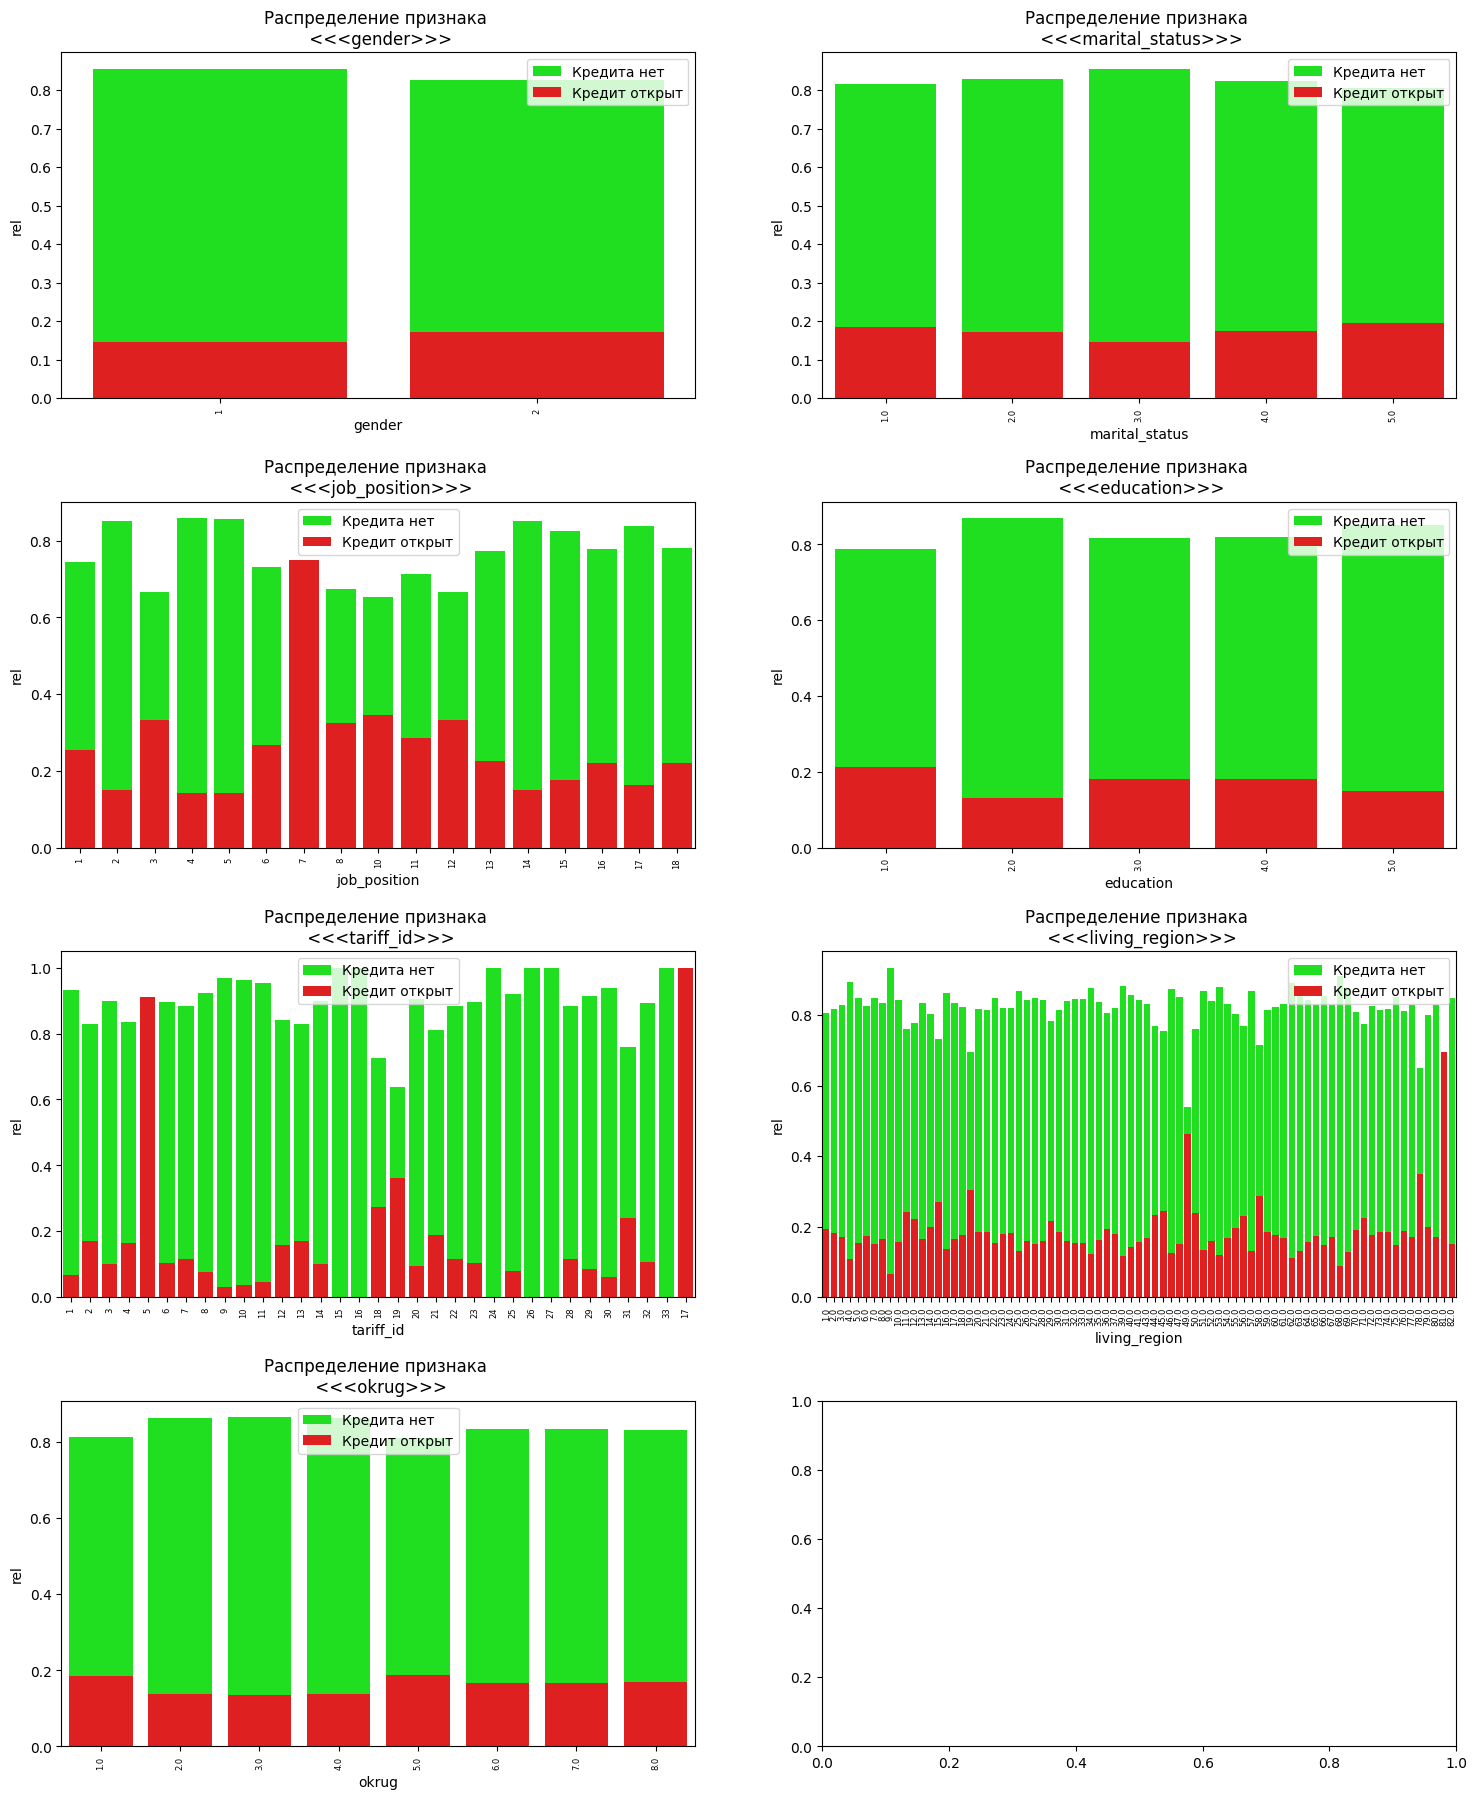

In [20]:
# построим графики по процентам по каждой категории
lst_cat = ['gender','marital_status', 'job_position','education', 'tariff_id',
           'living_region', 'okrug']
names_df_lst_cat = ['df_'+x for x in lst_cat]

fig, ax = plt.subplots(4,2, figsize = (18,22))
plt.subplots_adjust(hspace = 0.3)
for index, col in enumerate(lst_cat):
    plt.subplot(4,2, index+1)
    exec("ax = sns.barplot("+names_df_lst_cat[index]+"["+names_df_lst_cat[index]+\
         ".open_account_flg == 0],y="+"'rel'"+",x='"+col+"', color='lime', label='Кредита нет')")
    exec("ax = sns.barplot("+names_df_lst_cat[index]+"["+names_df_lst_cat[index]+\
         ".open_account_flg == 1],y="+"'rel'"+",x='"+col+"', color='red', label='Кредит открыт')")
    ax.set_title(f'Распределение признака \n <<<{col}>>>')
    plt.xticks(rotation=90,fontsize=6)
    plt.legend()


**Вывод:**
По "Работе" (job_position) кредит окрывают всегда при значении равным 7.
По "Идентификационный номер тарифа" (tariff_id) можно сказать, что по значению 15,16,24,26,27,33 кредит не открывают.
А по значения 5,17 кредит открывают всегда. По "Регион" (living_region) всех больше открывают 49 и 81 регионе.



---



***Исследуем возможные зависимости между признаками***

In [21]:
# df_clear[['gender','marital_status', 'job_position','education', 'tariff_id',
#            'living_region', 'okrug', 'age','credit_sum', 'credit_month', 'score_shk', 'avregzarplata',
#             'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg']].corr()

df_corr = df_clear[['gender','marital_status', 'job_position','education', 'tariff_id',
           'living_region', 'okrug', 'age','credit_sum', 'credit_month', 'score_shk', 'avregzarplata',
            'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg']].corr()
df_corr

,gender,marital_status,job_position,education,tariff_id,living_region,okrug,age,credit_sum,credit_month,score_shk,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
gender,1.000000,0.021045,-0.023033,0.083020,0.014205,-0.000061,0.008484,-0.130731,0.024741,0.003253,-0.005632,0.025078,0.236808,-0.014689,0.000854,0.037708
marital_status,0.021045,1.000000,0.014476,0.011994,0.036760,-0.002455,-0.008396,-0.106470,0.037941,-0.004804,0.064350,0.023890,-0.028566,-0.060825,-0.019207,0.014127
job_position,-0.023033,0.014476,1.000000,-0.003689,-0.004263,0.007808,-0.022441,-0.103498,-0.043778,-0.010979,-0.002310,0.027942,-0.089803,0.002553,-0.003370,-0.026673
education,0.083020,0.011994,-0.003689,1.000000,0.075993,-0.013238,-0.003265,0.059567,-0.167957,-0.006093,0.243933,-0.044557,-0.203638,-0.024074,-0.022193,0.058195
tariff_id,0.014205,0.036760,-0.004263,0.075993,1.000000,0.004985,0.003789,-0.100008,0.076201,-0.103509,0.434140,0.023408,0.015282,-0.062019,0.089956,-0.041455
living_region,-0.000061,-0.002455,0.007808,-0.013238,0.004985,1.000000,-0.225380,0.001328,0.014767,-0.004247,-0.013880,0.091949,-0.000772,-0.005395,-0.003984,-0.009901
okrug,0.008484,-0.008396,-0.022441,-0.003265,0.003789,-0.225380,1.000000,-0.001734,0.019032,-0.017606,0.024775,0.117496,0.042999,-0.009374,0.005749,0.028564
age,-0.130731,-0.106470,-0.103498,0.059567,-0.100008,0.001328,-0.001734,1.000000,-0.088165,0.003009,-0.146513,-0.005993,-0.031742,0.118419,0.009396,-0.001246
credit_sum,0.024741,0.037941,-0.043778,-0.167957,0.076201,0.014767,0.019032,-0.088165,1.000000,0.189954,0.054252,0.187744,0.358768,-0.000574,-0.008663,-0.074030
credit_month,0.003253,-0.004804,-0.010979,-0.006093,-0.103509,-0.004247,-0.017606,0.003009,0.189954,1.000000,0.025271,-0.001784,-0.004132,0.041132,0.008070,0.037638


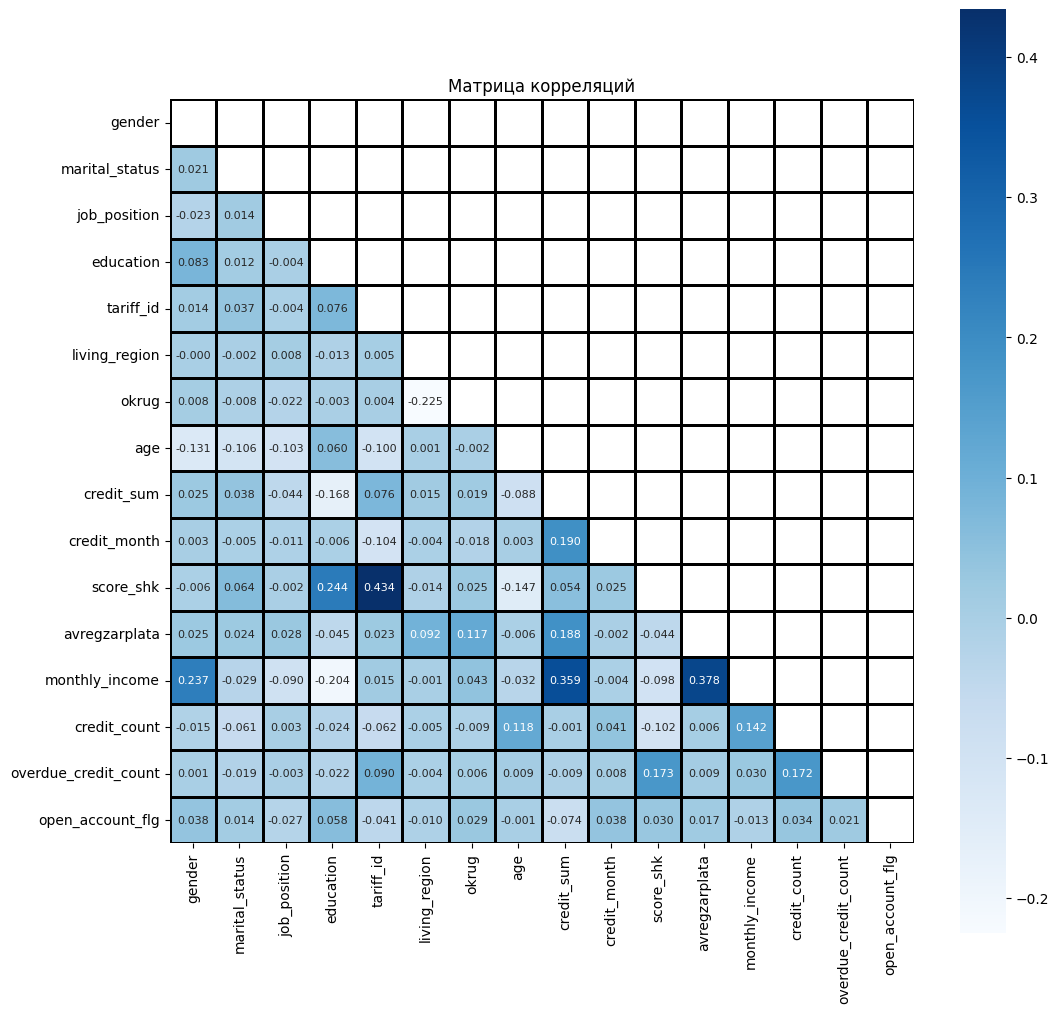

In [22]:
# строим тепловую карту

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_corr, annot=True, square=True,
                 cmap='Blues', fmt='.3f', linewidths=1,
                 annot_kws={'size': 8},
                 linecolor='black', mask=np.triu(df_corr))
plt.title('Матрица корреляций')
plt.show()

***Вывод::***

Мы видим зависимость между целевой переменной open_account_flg (Факт открытия кредитного счета в данном банке) и: education (Образование).
Хотя она не сильно сильная.

Также видим связь между score_shk (Внутренняя скоринговая оценка) и tariff_id (Идентификационный номер тарифа), monthly_income (Месячный заработок) и avregzarplata(Средняя заработная плата в регионе).











---



# **Шаг №4. Отбор признаков и портреты клиентов**

***Исследуем признаки в разрезе групп***


In [23]:
# формируем выборки -- случайные величины - посмотрим корреляции с open_account_flg

# если pvalue < 0.05 то коэффициент statistic - отличается от нуля - значит между двумя признаками существует линейная связь
# если pvalue > 0.05 то коэффициент statistic - НЕ отличается от нуля - нет связи - то они друг на друга не влияют

lst_corr = ['gender','marital_status', 'job_position','education', 'tariff_id',
           'living_region', 'okrug', 'age','credit_sum', 'credit_month', 'score_shk', 'avregzarplata',
            'monthly_income', 'credit_count', 'overdue_credit_count']

print('Cуществует линейная связь c "open_account_flg" - value < 0.05' )
for index, col in enumerate(lst_corr):
    x = df_clear[df_clear['open_account_flg']==0][col] # первая выборка -- оставшиеся клиенты -- закон распределения F(x)
    y = df_clear[df_clear['open_account_flg']==1][col] # вторая выборка -- ушедшие клиенты  -- закон распределения F(y)
    print(f'--- {col} --- ')

    st,pv = ks_2samp(x, y)
    if pv < 0.05:
         print('     --- ks_2samp --- ',ks_2samp(x, y))

    st,pv = kstest(x, 'norm',
                   args=(df_clear[df_clear['open_account_flg']==1][col].mean(),
                         df_clear[df_clear['open_account_flg']==1][col].std()))
    if pv < 0.05:
        print('     --- kstest --- ',kstest(x, 'norm',
                     args=(df_clear[df_clear['open_account_flg']==1][col].mean(),
                           df_clear[df_clear['open_account_flg']==1][col].std())))



Cуществует линейная связь c "open_account_flg" - value < 0.05
--- gender --- 
     --- ks_2samp ---  KstestResult(statistic=0.05159980196085445, pvalue=4.274872393271522e-46, statistic_location=1, statistic_sign=1)
     --- kstest ---  KstestResult(statistic=0.38084287203828515, pvalue=0.0, statistic_location=1, statistic_sign=1)
--- marital_status --- 
     --- ks_2samp ---  KstestResult(statistic=0.04235525486881131, pvalue=3.4130967095862017e-31, statistic_location=3.0, statistic_sign=1)
     --- kstest ---  KstestResult(statistic=0.30052063116402805, pvalue=0.0, statistic_location=3.0, statistic_sign=1)
--- job_position --- 
     --- ks_2samp ---  KstestResult(statistic=0.039503377585460395, pvalue=3.448446250982315e-27, statistic_location=13, statistic_sign=-1)
     --- kstest ---  KstestResult(statistic=0.5297410866924926, pvalue=0.0, statistic_location=14, statistic_sign=-1)
--- education --- 
     --- ks_2samp ---  KstestResult(statistic=0.08665036480241567, pvalue=2.4566176764



---



***Выявим наличие значимых различий в значениям признаков в разрезе групп***


In [24]:
# Сравним Z критерии одной позиции с суммой всех остальных

lst_cat = ['gender','marital_status', 'job_position','education', 'tariff_id',
           'living_region', 'okrug']

for index, col in enumerate(lst_cat,start=1):
    name_df = "df_"+col
    print('------------- '+'df_'+col+' -----------------')


------------- df_gender -----------------
------------- df_marital_status -----------------
------------- df_job_position -----------------
------------- df_education -----------------
------------- df_tariff_id -----------------
------------- df_living_region -----------------
------------- df_okrug -----------------


In [25]:
import scipy.stats as st
def test_z_criterion(event_name, alpha):
    # m1 = df_gender.loc[1, 'client_id']
    # m2 = df_gender.loc[3, 'client_id']

    # n1 = df_gender.loc[1, 'count']
    # n2 = df_gender.loc[3, 'count']

    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2 #1-F(t)
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print(f'm1={m1}, m2={m2}, n1={n1}, n2={n2}')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по событию <<{event_name}>> статистически значима.""")
    else: print(f"""НЕ получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<{event_name}>> статистически незначима.""")
#     if p_value >= alpha:
#         print('Результаты проверки гипотезы H_0 по z-критерию:')
#         print(f'm1={m1}, m2={m2}, n1={n1}, n2={n2}')
#         print('Уровень значимости alpha={:.2f}'.format(alpha))
#         print('P-value: {:.2f}'.format(p_value))
#         print(f"""НЕ получилось отвергнуть нулевую гипотезу: разница в долях по
# событию <<{event_name}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [26]:
print('-------------------------------------------- df_gender --------------------------------------------')
for i in range(1, df_gender.shape[0]-1, 2):
    m=0
    n=0
    for index, row in df_gender.iterrows():
        if row['open_account_flg'] == 1:
            m=m+row['client_id']
            n=n+row['count']
        if index == i and row['open_account_flg'] == 1:
            m1 = row['client_id']
            n1 = row['count']

            # print(df_gender.loc[index, 'client_id'])
            # print(df_gender.loc[index, 'count'])
    m2 = m-m1
    n2 = n - n1
    test_z_criterion(1, 0.05)



-------------------------------------------- df_gender --------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=11172.0, m2=12271.0, n1=76967.0, n2=71050.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------


In [27]:
print('-------------------------------------------- df_marital_status --------------------------------------------')
for i in range(1, df_marital_status.shape[0]-1, 2):
    m=0
    n=0
    for index, row in df_marital_status.iterrows():
        if row['open_account_flg'] == 1:
            m=m+row['client_id']
            n=n+row['count']
        if index == i and row['open_account_flg'] == 1:
            m1 = row['client_id']
            n1 = row['count']

            # print(df_gender.loc[index, 'client_id'])
            # print(df_gender.loc[index, 'count'])
    m2 = m-m1
    n2 = n - n1
    test_z_criterion(1, 0.05)

-------------------------------------------- df_marital_status --------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=671.0, m2=22772.0, n1=3646.0, n2=144371.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=2623.0, m2=20820.0, n1=15328.0, n2=132689.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=12136.0, m2=11307.0, n1=83726.0, n2=64291.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-крит

In [28]:
print('-------------------------------------------- df_job_position --------------------------------------------')
for i in range(1, df_job_position.shape[0]-1, 2):
    m=0
    n=0
    for index, row in df_job_position.iterrows():
        if row['open_account_flg'] == 1:
            m=m+row['client_id']
            n=n+row['count']
        if index == i and row['open_account_flg'] == 1:
            m1 = row['client_id']
            n1 = row['count']

            # print(df_gender.loc[index, 'client_id'])
            # print(df_gender.loc[index, 'count'])
    m2 = m-m1
    n2 = n - n1
    test_z_criterion(1, 0.05)

-------------------------------------------- df_job_position --------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=579.0, m2=22864.0, n1=2276.0, n2=145741.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=698.0, m2=22745.0, n1=4685.0, n2=143332.0
Уровень значимости alpha=0.05
P-value: 0.07
НЕ получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<1>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=29.0, m2=23414.0, n1=87.0, n2=147930.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 п

In [29]:
print('-------------------------------------------- df_education --------------------------------------------')
for i in range(1, df_education.shape[0]-1, 2):
    m=0
    n=0
    for index, row in df_education.iterrows():
        if row['open_account_flg'] == 1:
            m=m+row['client_id']
            n=n+row['count']
        if index == i and row['open_account_flg'] == 1:
            m1 = row['client_id']
            n1 = row['count']

            # print(df_gender.loc[index, 'client_id'])
            # print(df_gender.loc[index, 'count'])
    m2 = m-m1
    n2 = n - n1
    test_z_criterion(1, 0.05)

-------------------------------------------- df_education --------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=16.0, m2=23427.0, n1=75.0, n2=147942.0
Уровень значимости alpha=0.05
P-value: 0.19
НЕ получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<1>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=8310.0, m2=15133.0, n1=63289.0, n2=84728.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=74.0, m2=23369.0, n1=407.0, n2=147610.0
Уровень значимости alpha=0.05
P-value: 0.19
НЕ получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<1>> статистически незначима.
------------------------------------------------------------
Результаты проверки г

In [30]:
print('-------------------------------------------- df_tariff_id --------------------------------------------')
for i in range(1, df_tariff_id.shape[0]-1, 2):
    m=0
    n=0
    for index, row in df_tariff_id.iterrows():
        if row['open_account_flg'] == 1:
            m=m+row['client_id']
            n=n+row['count']
        if index == i and row['open_account_flg'] == 1:
            m1 = row['client_id']
            n1 = row['count']

            # print(df_gender.loc[index, 'client_id'])
            # print(df_gender.loc[index, 'count'])
    m2 = m-m1
    n2 = n - n1
    test_z_criterion(1, 0.05)

-------------------------------------------- df_tariff_id --------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=128.0, m2=23315.0, n1=1905.0, n2=146082.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=10307.0, m2=13136.0, n1=60897.0, n2=87090.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=296.0, m2=23147.0, n1=2906.0, n2=145081.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m

In [31]:
print('-------------------------------------------- df_living_region --------------------------------------------')
for i in range(1, df_living_region.shape[0]-1, 2):
    m=0
    n=0
    for index, row in df_living_region.iterrows():
        if row['open_account_flg'] == 1:
            m=m+row['client_id']
            n=n+row['count']
        if index == i and row['open_account_flg'] == 1:
            m1 = row['client_id']
            n1 = row['count']

            # print(df_gender.loc[index, 'client_id'])
            # print(df_gender.loc[index, 'count'])
    m2 = m-m1
    n2 = n - n1
    test_z_criterion(1, 0.05)

-------------------------------------------- df_living_region --------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=93.0, m2=23350.0, n1=480.0, n2=147537.0
Уровень значимости alpha=0.05
P-value: 0.03
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=139.0, m2=23304.0, n1=760.0, n2=147257.0
Уровень значимости alpha=0.05
P-value: 0.06
НЕ получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<1>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=285.0, m2=23158.0, n1=1664.0, n2=146353.0
Уровень значимости alpha=0.05
P-value: 0.15
НЕ получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<1>> статистически незначима.
------------------------------------------------------------
Результаты прове

In [32]:
print('-------------------------------------------- df_okrug --------------------------------------------')
for i in range(1, df_okrug.shape[0]-1, 2):
    m=0
    n=0
    for index, row in df_okrug.iterrows():
        if row['open_account_flg'] == 1:
            m=m+row['client_id']
            n=n+row['count']
        if index == i and row['open_account_flg'] == 1:
            m1 = row['client_id']
            n1 = row['count']

            # print(df_gender.loc[index, 'client_id'])
            # print(df_gender.loc[index, 'count'])
    m2 = m-m1
    n2 = n - n1
    test_z_criterion(1, 0.05)

-------------------------------------------- df_okrug --------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=1125.0, m2=22318.0, n1=6064.0, n2=141953.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=4379.0, m2=19064.0, n1=31770.0, n2=116247.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1=2620.0, m2=20823.0, n1=19477.0, n2=128540.0
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
m1

Вывод:
По признакам 'gender','marital_status', 'job_position','education', 'tariff_id', 'living_region', 'okrug' - есть параметры прикоторых мы принимаем и не принимает гипотезу H0





---



***Формулировка и проверка гипотезы о равенстве значений показателей по группам***

**Формулировка гипотезы**

H0  (основная): разница в значениях баллов переменных

age','credit_sum', 'credit_month', 'score_shk', 'avregzarplata',             'monthly_income', 'credit_count', 'overdue_credit_count'

для открывших и не открывших кредит клиентов отсутствует (стастически незначима);  



---



# **Шаг №5.Построение классификационных моделей**

***Построение несколько моделей классификации и сравнение их.***


In [33]:
# Построим квалификационную модель для всех признаков (всему набору)

In [34]:
# надо взять randomForest (целевой признак факт открытия счета)
df_clear.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avregzarplata', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg',
       'date_bank'],
      dtype='object')

In [35]:
lst_col = ['gender', 'age', 'marital_status',
           'job_position', 'credit_sum', 'credit_month',
           'score_shk', 'education', 'tariff_id',
           'living_region', 'okrug', 'avregzarplata', 'monthly_income',
           'credit_count', 'overdue_credit_count', 'open_account_flg']

X = df_clear[lst_col].drop(columns='open_account_flg')
y = df_clear['open_account_flg']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=0)
# 4. стандартизация/нормализация данных;
# преобразование ведется только для независимых наборов признаков
scaler = MinMaxScaler()

# обучаем скалер на независимом обучающем множестве
scaler.fit(x_train)

# преобразуем исходный независимый обучающий набор
x_train_norm = scaler.transform(x_train)

# преобразуем исходный независимый тестовый набор по параметрам обучающего набора
x_test_norm = scaler.transform(x_test)

# классификатор случайного леса -- RandomForestClassifier
grid_searcher = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid={
        # 'n_estimators': [50, 150, 200],
        # 'max_depth' : [4, 6, 12]
        'n_estimators': [50],
        'max_depth' : [4, 6]
    },
    cv=5,
    scoring='accuracy')

grid_searcher.fit(x_train_norm, y_train);
print ('best_score -- {}'.format(grid_searcher.best_score_))
print ('best_params -- {}'.format(grid_searcher.best_params_))

rnd_clf = RandomForestClassifier(n_estimators = \
                                 grid_searcher.best_params_['n_estimators'], \
                                 max_depth = grid_searcher.best_params_['max_depth'], random_state=42)
rnd_clf.fit(x_train_norm, y_train)
y_pred = rnd_clf.predict(x_test_norm)
print('Метрики качества для RandomForestClassifier', '\n',
      classification_report(y_test, y_pred))

best_score -- 0.8413392400761129
best_params -- {'max_depth': 4, 'n_estimators': 50}
Метрики качества для RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     37402
           1       0.00      0.00      0.00      7004

    accuracy                           0.84     44406
   macro avg       0.42      0.50      0.46     44406
weighted avg       0.71      0.84      0.77     44406



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Мы видим, что полнота первого класса равна нулю.

In [37]:
# отбалансируем выборку
df_to_class = pd.concat([df_clear[df_clear.open_account_flg == 0].sample(25000),
           df_clear[df_clear.open_account_flg == 1]])
lst_col = ['gender', 'age', 'marital_status',
           'job_position', 'credit_sum', 'credit_month',
           'score_shk', 'education', 'tariff_id',
           'living_region', 'okrug', 'avregzarplata', 'monthly_income',
           'credit_count', 'overdue_credit_count', 'open_account_flg']

X = df_to_class[lst_col].drop(columns='open_account_flg')
y = df_to_class['open_account_flg']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=0)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

grid_searcher = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid={
        # 'n_estimators': [50, 150, 200],
        # 'max_depth' : [4, 6, 12]
        'n_estimators': [50],
        'max_depth' : [4, 6]
    },
    cv=5,
    scoring='accuracy')

grid_searcher.fit(x_train_norm, y_train);
print ('best_score -- {}'.format(grid_searcher.best_score_))
print ('best_params -- {}'.format(grid_searcher.best_params_))

rnd_clf = RandomForestClassifier(n_estimators = \
                                 grid_searcher.best_params_['n_estimators'], \
                                 max_depth = grid_searcher.best_params_['max_depth'], random_state=42)
rnd_clf.fit(x_train_norm, y_train)
y_pred = rnd_clf.predict(x_test_norm)
print('Метрики качества для RandomForestClassifier', '\n',
      classification_report(y_test, y_pred))

best_score -- 0.6680625184311413
best_params -- {'max_depth': 6, 'n_estimators': 50}
Метрики качества для RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      7470
           1       0.68      0.65      0.66      7063

    accuracy                           0.68     14533
   macro avg       0.68      0.68      0.68     14533
weighted avg       0.68      0.68      0.68     14533



In [38]:
# посмотрим важность признаков
['gender', 'age', 'marital_status','job_position', 'credit_sum',
 'credit_month',  'score_shk', 'education', 'tariff_id','living_region',
 'okrug', 'avregzarplata', 'monthly_income','credit_count', 'overdue_credit_count']
rnd_clf.feature_importances_

array([0.0161025 , 0.02528214, 0.01347969, 0.03089214, 0.13560696,
       0.1267745 , 0.1160706 , 0.04917967, 0.40642623, 0.01180198,
       0.01529736, 0.02033228, 0.01612364, 0.01291586, 0.00371445])

In [39]:
# сопоставим значения feature_importances_ и признаками датафрейма
list(zip(df_to_class.columns, rnd_clf.feature_importances_))

[('client_id', 0.016102502684368438),
 ('gender', 0.02528213742705036),
 ('age', 0.013479689523452996),
 ('marital_status', 0.030892144084460445),
 ('job_position', 0.1356069610483993),
 ('credit_sum', 0.12677450212625568),
 ('credit_month', 0.11607059618957188),
 ('score_shk', 0.04917966802068438),
 ('education', 0.40642623291845265),
 ('tariff_id', 0.011801978324792512),
 ('living_region', 0.015297359637730597),
 ('okrug', 0.02033228256637777),
 ('avregzarplata', 0.016123635198963787),
 ('monthly_income', 0.012915863624243457),
 ('credit_count', 0.0037144466251958657)]

**Получается что самы важные признаки это 'job_position', 'credit_sum', 'education'**

In [40]:
# Если посмотреть Z критерий по выборкам то значимые являются:
# df_gender - по всем параметрам
# df_marital_status- по всем параметрам
# df_job_position - по параметрам:
    # m1=579.0, m2=22864.0, n1=2276.0, n2=145741.0
    # m1=29.0, m2=23414.0, n1=87.0, n2=147930.0
    # m1=436.0, m2=23007.0, n1=3073.0, n2=144944.0
    # m1=49.0, m2=23394.0, n1=183.0, n2=147834.0
    # m1=3.0, m2=23440.0, n1=4.0, n2=148013.0
    # m1=124.0, m2=23319.0, n1=381.0, n2=147636.0
    # m1=1007.0, m2=22436.0, n1=2911.0, n2=145106.0
    # m1=12.0, m2=23431.0, n1=42.0, n2=147975.0
    # m1=17621.0, m2=5822.0, n1=118006.0, n2=30011.0
    # m1=2702.0, m2=20741.0, n1=15398.0, n2=132619.0
    # m1=66.0, m2=23377.0, n1=298.0, n2=147719.0
# df_education  - по параметрам:-
    # m1=8310.0, m2=15133.0, n1=63289.0, n2=84728.0
    # m1=13865.0, m2=9578.0, n1=76334.0, n2=71683.0
# df_tariff_id - по параметрам:
    # m1=128.0, m2=23315.0, n1=1905.0, n2=146082.0
    # m1=10307.0, m2=13136.0, n1=60897.0, n2=87090.0
    # m1=296.0, m2=23147.0, n1=2906.0, n2=145081.0
    # m1=31.0, m2=23412.0, n1=34.0, n2=147953.0
    # m1=196.0, m2=23247.0, n1=1892.0, n2=146095.0
    # m1=53.0, m2=23390.0, n1=461.0, n2=147526.0
    # m1=53.0, m2=23390.0, n1=687.0, n2=147300.0
    # m1=16.0, m2=23427.0, n1=523.0, n2=147464.0
    # m1=12.0, m2=23431.0, n1=325.0, n2=147662.0
    # m1=15.0, m2=23428.0, n1=329.0, n2=147658.0
    # m1=494.0, m2=22949.0, n1=6322.0, n2=141665.0
    # m1=494.0, m2=22949.0, n1=6322.0, n2=141665.0
    # m1=3695.0, m2=19748.0, n1=32257.0, n2=115730.0
    # m1=72.0, m2=23371.0, n1=851.0, n2=147136.0
    # m1=289.0, m2=23154.0, n1=4802.0, n2=143185.0
    # m1=71.0, m2=23372.0, n1=296.0, n2=147691.0
    # m1=41.0, m2=23402.0, n1=382.0, n2=147605.0
# df_okrug - по всем параметрам.

**Построим квалификационную модель по значимым признакам**

исходя из df_education  - по параметрам:-

m1=8310.0, m2=15133.0, n1=63289.0, n2=84728.0

m1=13865.0, m2=9578.0, n1=76334.0, n2=71683.0

In [41]:
# df_education  - по параметрам:-
# m1=8310.0, m2=15133.0, n1=63289.0, n2=84728.0
# m1=13865.0, m2=9578.0, n1=76334.0, n2=71683.0

m1=8310.0
m2=15133.0
n1=63289.0
n2=84728.0

df_z_model = pd.DataFrame({'tariff_id': [1,1,2,2],
                                 'open_account_flg': [0,1,0,1],
                                 'client_id':[n1-m1, m1, n2-m2, m2],
                                 'count':[n1, n1, n2, n2]  } )

lst_col = ['client_id','count','open_account_flg']

X = df_z_model[lst_col].drop(columns='open_account_flg')
y = df_z_model['open_account_flg']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=0)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

# grid_searcher = GridSearchCV(
#     RandomForestClassifier(random_state=0),
#     param_grid={
#         # 'n_estimators': [50, 150, 200],
#         # 'max_depth' : [4, 6, 12]
#         'n_estimators': [50],
#         'max_depth' : [4, 6]
#     },
#     cv=5,
#     scoring='accuracy')

# grid_searcher.fit(x_train_norm, y_train);
# print ('best_score -- {}'.format(grid_searcher.best_score_))
# print ('best_params -- {}'.format(grid_searcher.best_params_))

# rnd_clf = RandomForestClassifier(n_estimators = \
#                                  grid_searcher.best_params_['n_estimators'], \
#                                  max_depth = grid_searcher.best_params_['max_depth'], random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 10, max_depth = 2, random_state=42)

rnd_clf.fit(x_train_norm, y_train)
y_pred = rnd_clf.predict(x_test_norm)
print('Метрики качества для RandomForestClassifier', '\n',
      classification_report(y_test, y_pred))

Метрики качества для RandomForestClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2





---



# Общий вывод:
По итогам проведенного анализа можно сделать вывод, что признак 'Образование' (education)
так или иначе влияет на 'Факт открытия кредитного счета в данном банке' (open_account_flg)

Для дальнейшего анализа надо сравнить, не только
Z критерии одной позиции с суммой всех остальных,
но и сделать сравнение по перебору суммы n-позиций и оставшихся позиций

In [42]:
print("\033[3m\033[33m\033[41m{}\033[0m".format("В Е С Ь   К О Д   В Ы П О Л Н Е Н  !!!"))

В Е С Ь   К  О Д   В Ы П О Л Н Е Н  !!!




---

